In [1]:
# Done
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [3]:
def extract_mel(file_name):
    audio, sample_rate=librosa.load(file_name, res_type='kaiser_fast')
    mel=np.mean(librosa.feature.melspectrogram(audio ,sr=sample_rate, n_mels=100,fmax=8000).T, axis=0)
    
    return mel

In [4]:
metadata=pd.read_csv("UrbanSound8k/metadata/UrbanSound8k.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [6]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            mfccs = extract_mel(fn)
            features=np.reshape((mfccs),(20,5))
             
    
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold1/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold2/.DS_Store
UrbanSound8K/audio/fold3/.DS_Store
UrbanSound8K/audio/fold4/.DS_Store
UrbanSound8K/audio/fold5/.DS_Store
UrbanSound8K/audio/fold6/.DS_Store
UrbanSound8K/audio/fold7/.DS_Store
UrbanSound8K/audio/fold8/.DS_Store
UrbanSound8K/audio/fold9/.DS_Store
UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  10
time taken: 19.0 minutes 50.4 seconds
None
Finished feature extraction from all folder


In [10]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[0.0007328666, 0.005847379, 0.011365381, 0.00...","(20, 5)",dog_bark,1
1,"[[0.0005349019, 0.0050235675, 0.017447481, 0.0...","(20, 5)",dog_bark,1
2,"[[0.0045490726, 0.012826807, 0.010148568, 0.00...","(20, 5)",dog_bark,1
3,"[[0.032951917, 0.05150818, 0.12763184, 0.02615...","(20, 5)",dog_bark,1
4,"[[8.504567, 2.6181707, 1.2740357, 0.62617505, ...","(20, 5)",gun_shot,1


In [11]:
Stacked_feature_pd.Label.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

X = np.reshape(np.array(Stacked_feature_pd.Stacked_Features.tolist()), (8732, 100))
y = np.array(Stacked_feature_pd.Label.tolist())

le = LabelEncoder()
yy = le.fit_transform(y)
print(yy.shape)

(8732,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(X), yy, test_size=0.2,random_state=42)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 100) (1747, 100) (6985,) (1747,)


In [16]:
print(x_train[0][:10])

[-0.19409995 -0.24592765 -0.2574957  -0.25446683 -0.22865236 -0.1845806
 -0.1742027  -0.27934447 -0.22316997 -0.25186625]


### Classification using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=6) 

In [19]:
x_train=np.reshape(x_train,(6985,100))
x_test=np.reshape(x_test,(1747,100))
x_train.shape

(6985, 100)

In [20]:
start_time=timer()
knn_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 1.35 secs


In [21]:
print("Training accuracy is {:.2f}".format(knn_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(knn_model.score(x_test, y_test)))

Training accuracy is 0.79
Testing accuracy is 0.72


**Not much of a difference between Training and Testing accuracy so the model is not overfitted**

### Classification using Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [23]:
start_time=timer()
tree_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 2.70 secs


In [24]:
print("Training accuracy is {}".format(tree_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(tree_model.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.69


### Classification using SVM

In [25]:
from sklearn.svm import SVC

In [44]:
svc= SVC(kernel="rbf")

In [45]:
start_time=timer()
svc.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 22.86 secs


In [46]:
print("Training accuracy is {}".format(svc.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy is 0.4483894058697208
Testing accuracy is 0.43


### Classification using Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)

In [48]:
start_time = timer()
log.fit(x_train, y_train)
end_time == timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time - start_time)//60, (end_time- start_time)%60 ))

Total time required is -1.00 mins and 45.61 secs


In [49]:
print("Training accuracy is {}".format(log.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(log.score(x_test, y_test)))

Training accuracy is 0.5062276306370794
Testing accuracy is 0.48


### Classification using Ensemble Classifiers

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier(n_estimators=500)

In [52]:
start_time=timer()
rf.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 2.00 mins and 46.82 secs


In [53]:
print("Training accuracy is {}".format(rf.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(rf.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.87


**Overfitting using RandomForestClassifiers**

In [54]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [55]:
bg=BaggingClassifier()

In [56]:
start_time = timer()
bg.fit(x_train, y_train)
end_time = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 31.02 secs


In [57]:
print("Training accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_train, y_train)) )
print("Testing accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_test, y_test)) )

Training accuracy of the Bagging Classifier 1.00
Testing accuracy of the Bagging Classifier 0.81


In [58]:
ada= AdaBoostClassifier()

In [59]:
start_time= timer()
ada.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 25.87 secs


In [60]:
print("Training accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_train, y_train)) )
print("Testing accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_test, y_test)) )

Training accuracy of the AdaBoost Classifier 0.39
Testing accuracy of the AdaBoost Classifier 0.41


In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier()
start_time= timer()
gbc.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 12.00 mins and 31.95 secs


In [63]:
print("Training accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_train, y_train)) )
print("Testing accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_test, y_test)) )

Training accuracy of the Gradient Boosting Classifier 0.92
Testing accuracy of the Gradient Boosting Classifier 0.78


In [67]:
### Unsupervised Learning 
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=10)

In [68]:
kms.fit(x_train)

KMeans(n_clusters=10)

In [69]:
pd.crosstab(kms.predict(x_train), y_train)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,799,285,782,693,609,744,206,740,577,722
1,0,0,0,0,0,47,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0
3,0,2,3,3,0,0,0,0,99,0
4,0,43,15,16,146,1,20,43,0,13
5,0,1,0,0,0,0,0,0,0,0
6,6,23,2,82,8,9,88,0,49,71
7,0,0,0,0,14,0,2,0,0,0
8,0,0,0,14,1,2,1,0,0,0


In [71]:
print("Performance of the KMeans algorithm {}".format(np.score(kms.predict(x_test)==y_test)))

AttributeError: module 'numpy' has no attribute 'score'

In [72]:
### Visualizing the clusters formed with the MFCC features 
from sklearn.decomposition import PCA

In [73]:
cols=["mfcc_"+str(i) for i in range(1,101)]

In [74]:
X.shape

(8732, 100)

In [75]:
mfcc_pd=pd.DataFrame(data=scaler.fit_transform(X), columns=cols)
mfcc_pd["labels"]=y
mfcc_pd.head()


,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_92,mfcc_93,mfcc_94,mfcc_95,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,labels
0,-0.194094,-0.245846,-0.257338,-0.254405,-0.228413,-0.183040,-0.168400,-0.255636,-0.205028,-0.224966,...,-0.168960,-0.149873,-0.157563,-0.188760,-0.180248,-0.140350,-0.124752,-0.186866,-0.169289,dog_bark
1,-0.194096,-0.245861,-0.257168,-0.254123,-0.227894,-0.182221,-0.166327,-0.243851,-0.189817,-0.201324,...,-0.167880,-0.149260,-0.156838,-0.188098,-0.180092,-0.140230,-0.124718,-0.186773,-0.168994,dog_bark
2,-0.194046,-0.245725,-0.257372,-0.254421,-0.228669,-0.184072,-0.172084,-0.269980,-0.214520,-0.219644,...,-0.169794,-0.150657,-0.159099,-0.188738,-0.180254,-0.140208,-0.124723,-0.186834,-0.169147,dog_bark
3,-0.193691,-0.245054,-0.254095,-0.253805,-0.228509,-0.184462,-0.174646,-0.281940,-0.226030,-0.253798,...,-0.171996,-0.152102,-0.159575,-0.188732,-0.179793,-0.140039,-0.124475,-0.186240,-0.168856,dog_bark
4,-0.087734,-0.200533,-0.222128,-0.233749,-0.220536,-0.177039,-0.169342,-0.265926,-0.213420,-0.237289,...,-0.167441,-0.148069,-0.156195,-0.183988,-0.174449,-0.137087,-0.122181,-0.182401,-0.165284,gun_shot


In [76]:
pca=PCA(n_components=2)

In [77]:
pcas=pca.fit_transform(mfcc_pd.drop("labels", axis=1))

In [78]:
pca_cols=["pca_"+str(i) for i in range(1,3)]

In [79]:
main_df=pd.DataFrame(data=pcas, columns=pca_cols)
main_df["labels"]=y
main_df.head()

,pca_1,pca_2,labels
0,-0.856383,-0.022298,dog_bark
1,-0.906160,0.065177,dog_bark
2,-1.194932,0.036838,dog_bark
3,-1.644183,0.208951,dog_bark
4,-1.799046,0.500944,gun_shot


In [80]:
main_df.labels.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

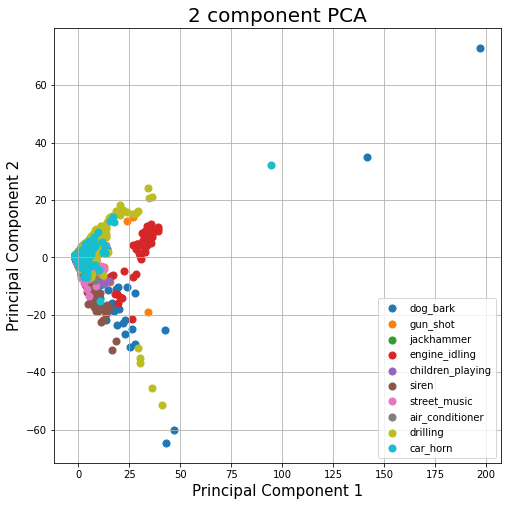

In [83]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets =['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['labels']== target
    #print(indicesToKeep[:10])
    ax.scatter(list(main_df.loc[indicesToKeep, 'pca_1'])
               ,list(main_df.loc[indicesToKeep, 'pca_2'])
               , c = color
               , s = 50)
ax.legend(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'])
ax.grid()

In [84]:
pcas=pca.explained_variance_ratio_
print("Total information ", sum(pcas))

Total information  0.3474593237042427


In [85]:
x_train, x_test, y_train, y_test = train_test_split(main_df.drop("labels", axis=1), main_df["labels"], test_size=0.2, random_state=42)

In [86]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 2) (1747, 2) (6985,) (1747,)


In [87]:
svc_2=SVC()
svc_2.fit(x_train, y_train)

SVC()

In [88]:
svc_2.score(x_test, y_test)

0.2633085289066972

In [89]:
x_test.shape[1]

2

In [90]:
# Predictions using SVC on 50 features
predictions=svc_2.predict(x_test)


In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
 mat=confusion_matrix(predictions, y_test)

In [93]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [94]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

<ipython-input-93-6ca8ccb31732>:6: RuntimeWarning: invalid value encountered in long_scalars
  acc = (correct / total) * 100


,CLASS,ACCURACY
8,Siren,68.055556
5,Engine Idling,63.636364
4,Drilling,55.681818
6,Gun Shot,45.161290
7,Jackhammer,35.655738
3,Dog bark,33.606557
9,Street Music,22.222222
2,Children Playing,17.827004
0,Air Conditioner,14.583333
1,Car Horn,NaN
